In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from gensim.models import FastText

In [3]:
modelf = FastText.load('bio_fasttextAll.pkl')

In [5]:
modelf.wv.most_similar(['bird','virus'],topn=10)

[('duck-billed', 0.6379626989364624),
 ('viruses', 0.6354326009750366),
 ('gyrovirus', 0.6257649660110474),
 ('cheravirus', 0.6205919981002808),
 ('macavirus', 0.6163315176963806),
 ('avian', 0.613429069519043),
 ('passerivirus', 0.6132458448410034),
 ('passerine', 0.6126269102096558),
 ('sunbird', 0.6102305054664612),
 ('lesavirus', 0.6091818809509277)]

In [6]:
modelf.wv.most_similar(['bat-borne','virus'],topn=10)

[('viruses', 0.7379791736602783),
 ('uukuviruses', 0.708194375038147),
 ('megabat-borne', 0.7062534093856812),
 ('viruse', 0.7061195373535156),
 ('virus-borne', 0.6996157169342041),
 ('rabiesvirus', 0.6970247626304626),
 ('flaviruses', 0.6850399374961853),
 ('sadwavirus', 0.6844695806503296),
 ('cheravirus', 0.6837590932846069),
 ('erboviruses', 0.6826598644256592)]

In [7]:
seeds  = ['coronavirus','variola','corona','varicella',
               'zoster','chickenpox','smallpox','herpes',
               'herpes simplex','rhinovirus','common cold',
              'polio','sars','mers','measles',
              'mumps','ebola','hiv','h1n1','h5n1','flu',
              'influenza']
wlist = [[r for r,w in modelf.wv.most_similar(seed,topn=20)] for seed in seeds]
wlist = list(set(sum(wlist,[])))
len(wlist)

332

In [8]:
import random

random.shuffle(wlist)
temp = wlist[:30] + seeds
temp = list(set(temp))

In [9]:
points = modelf.wv[temp]

In [10]:
import io

out_v = io.open('report/plotvect.tsv', 'w', encoding='utf-8')
out_m = io.open('report/plotmeta.tsv', 'w', encoding='utf-8')
for word in temp:
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in modelf.wv[word]]) + "\n")
out_v.close()
out_m.close()

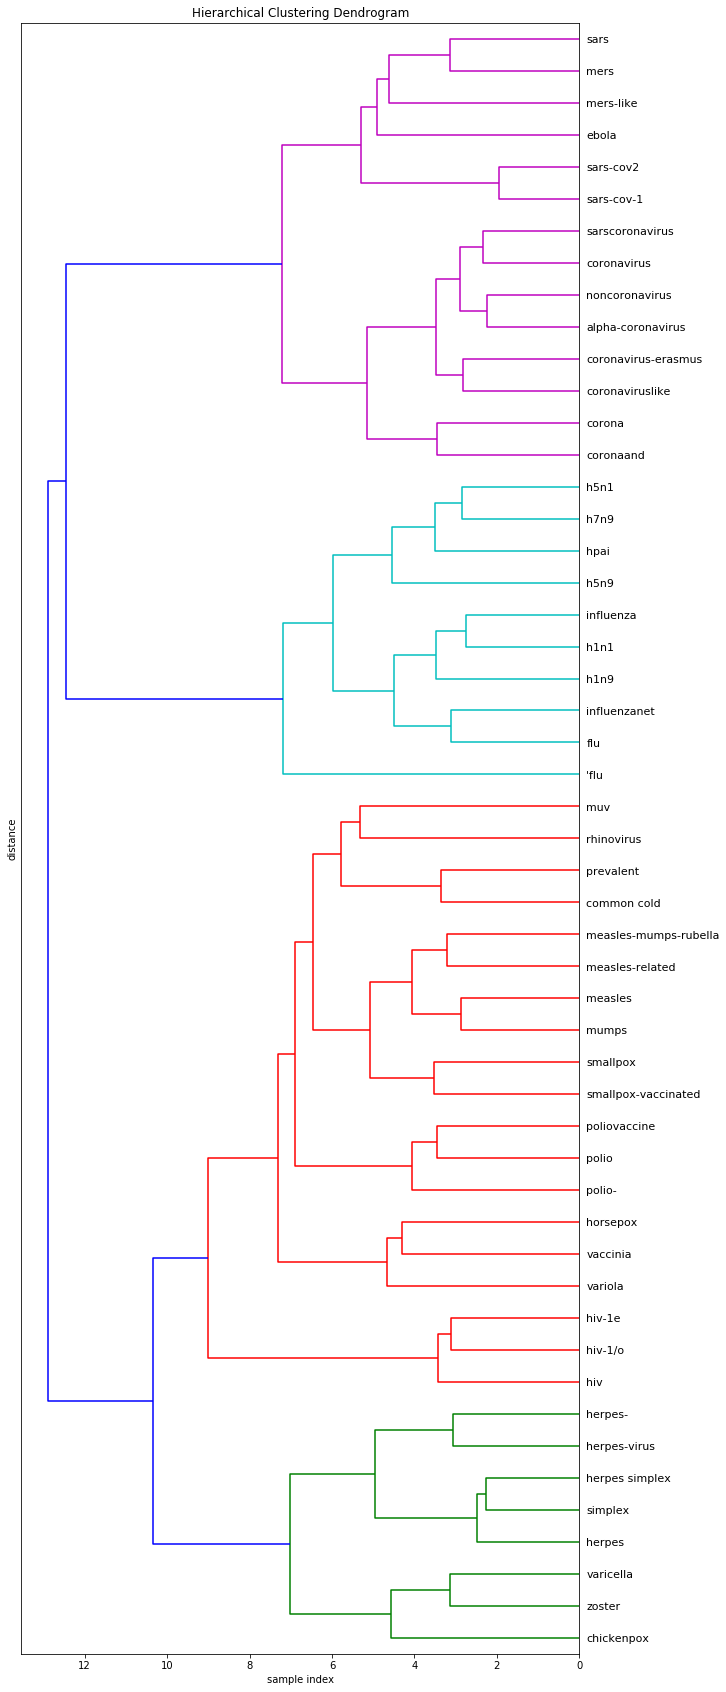

In [12]:
plt.figure(figsize=(10, 30))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'), labels=temp, 
                            orientation='left', leaf_font_size=11)# create clusters